# Pyber

After studying the data, the following three conclusions can be made:

1. Out of the three drive types, the Urban has a considerable advantage. The first thing to notice is that Urban rides is the one with the most drivers, with a total of 2405 drivers, representing 80.9% of the whole dataset.

2. Due to the last point, Urban types make the most revenue with a total of $39854.00. Related to this is the total number of rides that Urban types take, with a total of 1625 rides.

3. The final thing to mention is that though Rural rides, in average, charges the most, they are the ones that win the least. This is due to a combination of few drivers and few requests.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cityF = "city_data.csv"
rideF = "ride_data.csv"

cityCsv = pd.read_csv(cityF, encoding = 'utf-8')
rideCsv = pd.read_csv(rideF, encoding = 'utf-8')

cityCsv.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
rideCsv.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
merged_csv = rideCsv.merge(cityCsv, on='city')
merged_csv.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [6]:
urban_df = merged_csv.loc[merged_csv['type'] == 'Urban'].copy()
urban_group = urban_df.groupby(["city", "driver_count", 'type'])
urban_tot_fare = urban_group['fare'].sum()
urban_rides = urban_group['ride_id'].count()
urban_ave = urban_tot_fare / urban_rides
urban_driver = urban_group.apply(lambda x: x.name).index.get_level_values(1)

In [7]:
suburban_df = merged_csv.loc[merged_csv['type'] == 'Suburban'].copy()
suburban_group = suburban_df.groupby(["city", "driver_count", 'type'])
suburban_tot_fare = suburban_group['fare'].sum()
suburban_rides = suburban_group['ride_id'].count()
suburban_ave = suburban_tot_fare / suburban_rides
suburban_driver = suburban_group.apply(lambda x: x.name).index.get_level_values(1)

In [8]:
rural_df = merged_csv.loc[merged_csv['type'] == 'Rural'].copy()
rural_group = rural_df.groupby(["city", "driver_count", 'type'])
rural_tot_fare = rural_group['fare'].sum()
rural_rides = rural_group['ride_id'].count()
rural_ave = rural_tot_fare / rural_rides
rural_driver = rural_group.apply(lambda x: x.name).index.get_level_values(1)

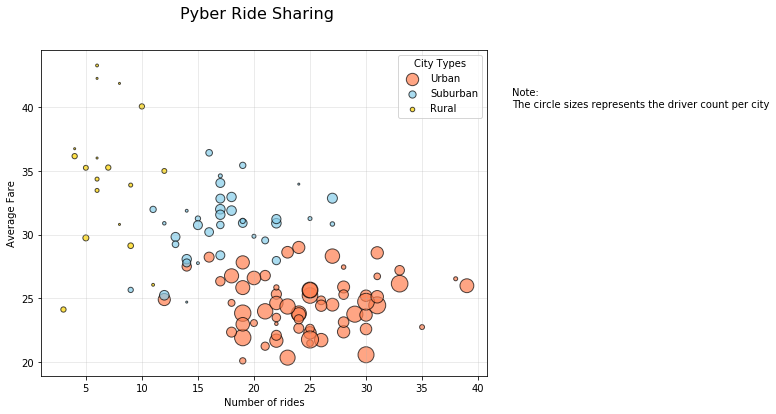

<Figure size 432x288 with 0 Axes>

In [9]:
# plt.scatter(driver_count, city_rides, s=ave_fare)
fig, pl = plt.subplots(figsize=(8,6))
fig.suptitle("Pyber Ride Sharing", fontsize = 16)

pl.scatter(urban_rides, urban_ave, s=urban_driver*4, c='coral', alpha=.7, edgecolors='black', label="Urban")
pl.scatter(suburban_rides, suburban_ave, s=suburban_driver*4, c='skyblue', alpha=.7, edgecolors='black', label="Suburban")
pl.scatter(rural_rides, rural_ave, s=rural_driver*4, c='gold', alpha=.7, edgecolors='black', label="Rural")
pl.set_xlabel("Number of rides")
pl.set_ylabel("Average Fare")
pl.grid(True, alpha=.3)
pl.legend(loc="best", title="City Types", markerscale=1)
pl.text(43,40,"Note:\nThe circle sizes represents the driver count per city")

plt.show()

plt.savefig("PyberRideSharing.png")

In [10]:
# % of Total Fares by City Type
city_type = merged_csv.copy()
city_group = city_type.groupby('type')

c_types = ['Rural', 'Suburban', 'Urban']
c_colors = ['gold', 'skyblue', 'coral']
c_explode = [0, 0, 0.1]

city_sum = city_group['fare'].sum()
city_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

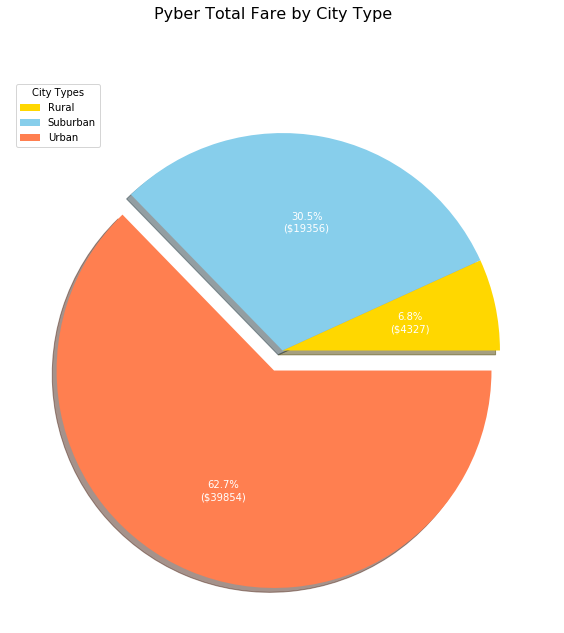

<Figure size 432x288 with 0 Axes>

In [11]:
fig, pie1 = plt.subplots(figsize=(10,10))
fig.suptitle("Pyber Total Fare by City Type", fontsize = 16)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n(${:d})".format(pct, absolute)

pie1.pie(city_sum, shadow=True, explode=c_explode, labels=c_types, colors=c_colors, autopct=lambda pct: func(pct, city_sum), textprops=dict(color="w"))
pie1.legend(loc='best', title="City Types")

plt.show()

plt.savefig("totalFare.png")

In [12]:
# % of Total Rides by City Type
city_count = city_group['fare'].count()
city_count


type
Rural        125
Suburban     625
Urban       1625
Name: fare, dtype: int64

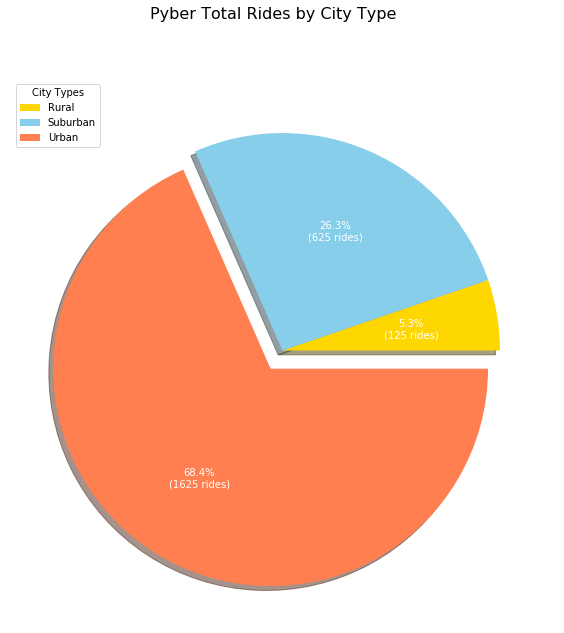

<Figure size 432x288 with 0 Axes>

In [13]:
fig, pie2 = plt.subplots(figsize=(10,10))
fig.suptitle("Pyber Total Rides by City Type", fontsize = 16)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} rides)".format(pct, absolute)

pie2.pie(city_count, shadow=True, explode=c_explode, labels=c_types, colors=c_colors, autopct=lambda pct: func(pct, city_count), textprops=dict(color="w"))
pie2.legend(loc='best', title="City Types")

plt.show()

plt.savefig("totalRides.png")

In [14]:
# % of Total Drivers by City Type
# city_drivers = city_group['driver_count'].sum()
# city_drivers
c_g = cityCsv.groupby("type")
c_sum = c_g['driver_count'].sum()

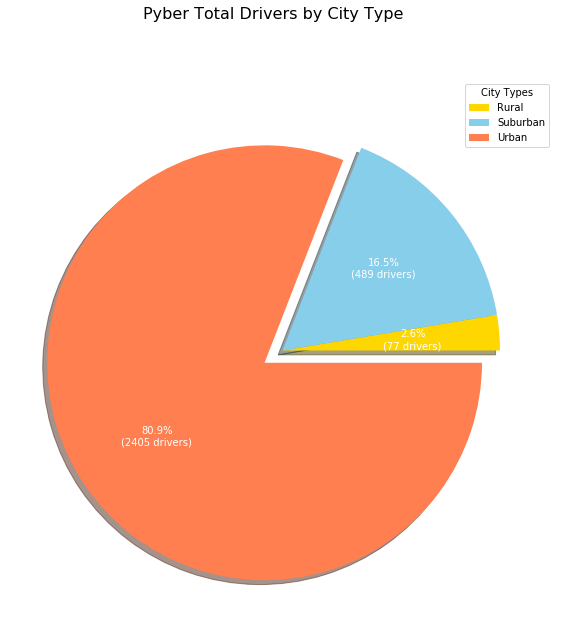

<Figure size 432x288 with 0 Axes>

In [15]:
fig, pie3 = plt.subplots(figsize=(10,10))
fig.suptitle("Pyber Total Drivers by City Type", fontsize = 16)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} drivers)".format(pct, absolute)

pie3.pie(c_sum, shadow=True, explode=c_explode, labels=c_types, colors=c_colors, autopct=lambda pct: func(pct, c_sum), textprops=dict(color="w"))
pie3.legend(loc='best', title="City Types")

plt.show()

plt.savefig("totalDrivers.png")